In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = fetch_california_housing()


In [5]:
dataset = pd.DataFrame(df.data)

In [6]:
dataset.columns=df.feature_names

In [7]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
## Independent features and dependent features
X = dataset
y = df.target

In [9]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [12]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [11]:
 ## standardizinf the dataset
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
## cross validation
from sklearn.model_selection import cross_val_score

In [16]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [18]:
np.mean(mse)

-0.5257104326777

In [19]:
## prediction
reg_pred = regression.predict(X_test)

In [20]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

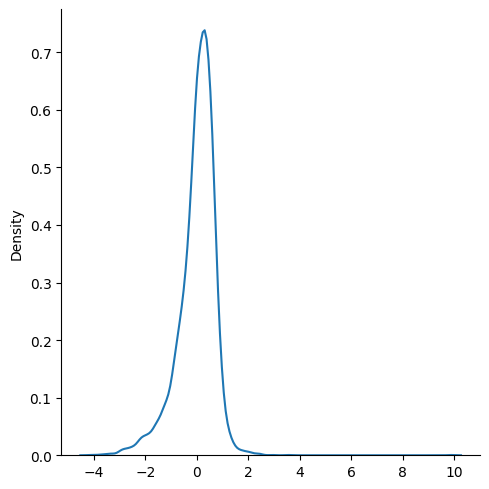

In [21]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind='kde')

In [22]:
from sklearn.metrics import r2_score

In [23]:
score = r2_score(reg_pred,y_test)

In [24]:
score

0.3451339380943961

# Ridge Regression

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [31]:
ridge_regressor = Ridge()

In [32]:
ridge_regressor

Ridge()

In [33]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [35]:
print(ridgecv.best_params_)

{'alpha': 5}


In [36]:
print(ridgecv.best_score_)

-0.5268179966861514


In [37]:
ridge_pred = ridgecv.predict(X_test)

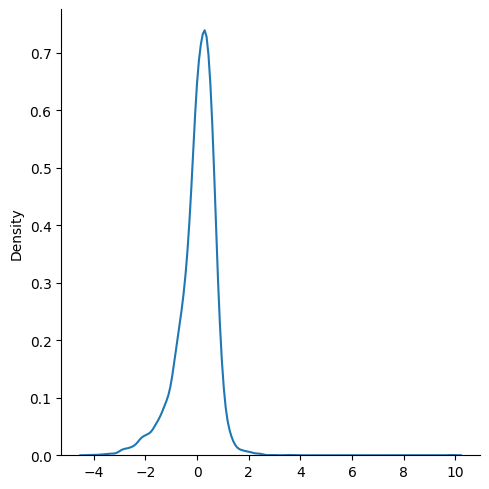

In [38]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind='kde')

In [39]:
score = r2_score(ridge_pred, y_test)

In [40]:
score

0.34383945441404484

# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso = Lasso()

In [43]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
lassocv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [44]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 5}
-0.5268179966861514


In [45]:
lasso_pred = lassocv.predict(X_test)

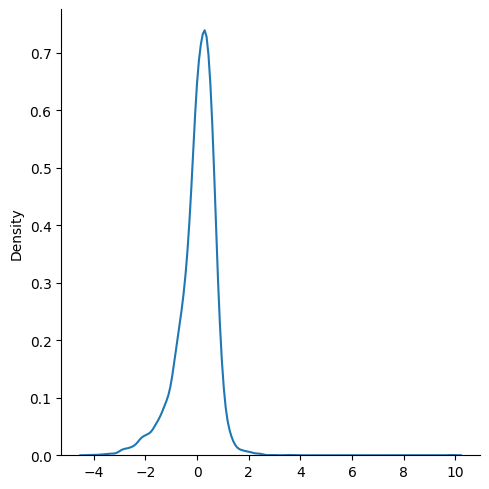

In [46]:
import seaborn as sns
sns.displot(lasso_pred-y_test, kind='kde')